In [6]:
import requests
import re
import pandas as pd
from urllib.parse import quote

In [7]:
# Define a user agent string
user_agent = 'MandarineCorp (clementine.naim@epfl.ch)'

# Specify the headers with the user agent
headers = {
    'User-Agent': user_agent,
    'accept': 'application/json'
}


In [8]:
#SUMMARY OF THE PAGE 

# URL for the Wikimedia REST API to get information about a page
url = f'https://en.wikipedia.org/api/rest_v1/page/summary/absurdism'

# Making a GET request
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Print the response content
    data = response.json()
    print(f"Title: {data['title']}")
    print(f"Description: {data['description']}")
    print(f"Extract: {data['extract']}")
else:
    # Print an error message if the request was unsuccessful
    print(f"Error: {response.status_code}")
    print(response.text)

Title: Absurdism
Description: Theory that life in general is meaningless
Extract: Absurdism is the philosophical theory that the universe is irrational and meaningless. It states that trying to find meaning leads people into a conflict with the world. This conflict can be between rational man and an irrational universe, between intention and outcome, or between subjective assessment and objective worth, but the precise definition of the term is disputed. Absurdism claims that the world as a whole is absurd. It differs in this regard from the less global thesis that some particular situations, persons, or phases in life are absurd.


In [9]:
#PAGEVIEW TEST FOR ONE
page_title= 'Absolute (philosophy)'

url = f'https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia.org/all-access/all-agents/{page_title}/daily/2020031500/2020041500'


# Making a GET request
response_views = requests.get(url,headers=headers)

# Check if the request was successful (status code 200)
if response_views.status_code == 200:
    # Print the response content
    data = response_views.json()
else: 
    # Print an error message if the request was unsuccessful
    print(f"Error: {response_views.status_code}")
    print(page_title)

# Extract the 'items' list from the data
items_list = data['items']
# Create a DataFrame
df = pd.DataFrame(items_list)
display(df)

,project,article,granularity,timestamp,access,agent,views
0,en.wikipedia,Absolute_(philosophy),daily,2020031500,all-access,all-agents,244
1,en.wikipedia,Absolute_(philosophy),daily,2020031600,all-access,all-agents,260
2,en.wikipedia,Absolute_(philosophy),daily,2020031700,all-access,all-agents,262
3,en.wikipedia,Absolute_(philosophy),daily,2020031800,all-access,all-agents,261
4,en.wikipedia,Absolute_(philosophy),daily,2020031900,all-access,all-agents,235
5,en.wikipedia,Absolute_(philosophy),daily,2020032000,all-access,all-agents,228
6,en.wikipedia,Absolute_(philosophy),daily,2020032100,all-access,all-agents,249
7,en.wikipedia,Absolute_(philosophy),daily,2020032200,all-access,all-agents,280
8,en.wikipedia,Absolute_(philosophy),daily,2020032300,all-access,all-agents,258
9,en.wikipedia,Absolute_(philosophy),daily,2020032400,all-access,all-agents,268


In [10]:
print(data)

{'items': [{'project': 'en.wikipedia', 'article': 'Absolute_(philosophy)', 'granularity': 'daily', 'timestamp': '2020031500', 'access': 'all-access', 'agent': 'all-agents', 'views': 244}, {'project': 'en.wikipedia', 'article': 'Absolute_(philosophy)', 'granularity': 'daily', 'timestamp': '2020031600', 'access': 'all-access', 'agent': 'all-agents', 'views': 260}, {'project': 'en.wikipedia', 'article': 'Absolute_(philosophy)', 'granularity': 'daily', 'timestamp': '2020031700', 'access': 'all-access', 'agent': 'all-agents', 'views': 262}, {'project': 'en.wikipedia', 'article': 'Absolute_(philosophy)', 'granularity': 'daily', 'timestamp': '2020031800', 'access': 'all-access', 'agent': 'all-agents', 'views': 261}, {'project': 'en.wikipedia', 'article': 'Absolute_(philosophy)', 'granularity': 'daily', 'timestamp': '2020031900', 'access': 'all-access', 'agent': 'all-agents', 'views': 235}, {'project': 'en.wikipedia', 'article': 'Absolute_(philosophy)', 'granularity': 'daily', 'timestamp': '20

In [11]:
#GET THE LIST OF PHILOSOPHIES PAGES from page list of philo (but only 5 languages)

# Specify the API endpoint URL
api_url = "https://en.wikipedia.org/w/api.php"

# Specify the parameters for the API request
params = {
    'action': 'query',
    'prop': 'revisions',
    'titles': 'List_of_philosophies',
    'rvslots': '*',
    'rvprop': 'content',
    'formatversion': 2,
    'format': 'json'
}

# Make the API request
response = requests.get(api_url, params=params)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()

    # Extract the content of the first revision
    revisions = data['query']['pages'][0]['revisions']
    
    if revisions:
        content = revisions[0]['slots']['main']['content']
        
        # Use a regular expression to find section titles
        section_titles = re.findall(r'\[\[([^|\]]+)(?:\|[^]]+)?\]\]', content)
        
        while section_titles[0][0]!='A' or section_titles[-1][0]!='Z':
            if section_titles[0][0]!='A':
                section_titles.pop(0)
            if section_titles[-1][0]!='Z':
                section_titles.pop(-1)

        # Display the list of section titles
        #print("List of Section Titles:")
        print(section_titles)
    else:
        print("No revision content found.")
else:
    # Print an error message if the request was unsuccessful
    print(f"Error: {response.status_code}")
    #print(response.text)


['Absurdism', 'Philosophy of action', 'Actual idealism', 'Actualism', 'Advaita Vedanta', 'Aesthetic Realism', 'Aesthetics', 'African philosophy', 'Afrocentrism', 'Agential realism', 'Agnosticism', 'Agnostic theism', 'American philosophy', 'Anarchy', 'Animism', 'Antinatalism', 'Antinomianism', 'Anti-psychiatry', 'Anti-realism', 'Antireductionism', 'Analytic philosophy', 'Anarchism', 'Ancient philosophy', 'Anthropocentrism', 'Anomalous monism', 'Applied ethics', 'Philosophy of archaeology', 'Aristotelianism', 'Philosophy of Arithmetic', 'Philosophy of art', 'Philosophy of artificial intelligence', 'Asceticism', 'Atheism', 'Authoritarianism', 'Averroism', 'Avicennism', 'Axiology', 'Baptism', 'Baptists', 'Behaviorism', 'Bayesianism', 'Bioconservatism', 'Philosophy of biology', 'Biosophy', 'Buddhist philosophy', 'Philosophy of business', 'Cartesianism', 'Categorical imperative', 'Charvaka', 'School of Naturalists', 'Neoplatonism and Christianity', 'Capitalism', 'The Philosophy of Chance', '

In [12]:
print(content)

{{Short description|None}}
{{See also|Glossary of philosophy}}
{{Philosophy sidebar|expanded=Lists}}

[[Philosophy|Philosophical]] [[school of thought|schools of thought]] and [[philosophical movement]]s.

{{compact ToC|side=no|top=yes|num=yes|seealso=yes|center=yes}}

==A==
[[Absurdism]] -
[[Philosophy of action|Action, philosophy of]] -
[[Actual idealism]] -
[[Actualism]] - 
[[Advaita Vedanta]] -
[[Aesthetic Realism]] -
[[Aesthetics]] -
[[African philosophy]] -
[[Afrocentrism]] -
[[Agential realism]] -
[[Agnosticism]] -
[[Agnostic theism]] -
[[American philosophy]] -
[[Anarchy]] -
[[Animism]] -
[[Antinatalism]] -
[[Antinomianism]] -
[[Anti-psychiatry]]—
[[Anti-realism]] -
[[Antireductionism]] -
[[Analytic philosophy]] -
[[Anarchism]] -
[[Ancient philosophy]] -
[[Anthropocentrism]] -
[[Anomalous monism]] -
[[Applied ethics]] -
[[Philosophy of archaeology|Archaeology, philosophy of]] -
[[Aristotelianism]] -
[[Philosophy of Arithmetic|Arithmetic, philosophy of]] -
[[Philosophy of art|Ar

In [13]:
#GET THE LIST OF PHILOSOPHIES PAGES With GLOSSARY  pages because in more languages 

# Specify the API endpoint URL
api_url = "https://en.wikipedia.org/w/api.php"

# Specify the parameters for the API request
params = {
    'action': 'query',
    'prop': 'revisions',
    'titles': 'Glossary_of_philosophy',
    'rvslots': '*',
    'rvprop': 'content',
    'formatversion': 2,
    'format': 'json'
}

# Make the API request
response = requests.get(api_url, params=params)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()

    # Extract the content of the first revision
    revisions = data['query']['pages'][0]['revisions']
    
    if revisions:
        content = revisions[0]['slots']['main']['content']
    else:
        print("No revision content found.")
else:
    # Print an error message if the request was unsuccessful
    print(f"Error: {response.status_code}")
    

#Avoid problem of double description of terms (part before | = page title ; after | = philosophy name)
term_matches = re.findall(r'{{term\|\[\[([^|\]]+)(?:\|[^]]+)?\]\]\}}', content)
# Display the list of extracted terms
print("List of Terms:")
print(term_matches)

List of Terms:
['Absolute (philosophy)', 'absurdism', 'Tychism', 'acosmism', 'aestheticism', 'agnostic atheism', 'agnostic theism', 'agnosticism', 'altruism', 'anarchism', 'anarcho-capitalism', 'anarcho-primitivism', 'anarcho-syndicalism', 'animism', 'anthropocentrism', 'anthropomorphism', 'antinatalism', 'Antinomianism', 'anti-realism', 'Aristotelianism', 'Arminianism', 'asceticism', 'ascriptivism', 'associationalism', 'atheism', 'atomism', 'authoritarianism', 'Surrealist automatism', 'behavioralism', 'behaviorism', 'biologism', 'Buddhism', 'capitalism', 'careerism', 'Cartesianism', 'Christian existential humanism', 'Christian existentialism', 'Christian humanism', 'Christian materialism', 'Christianity', 'classical theism', 'Classicism', 'Cognitivism (ethics)', 'coherentism', 'Colbertism', 'Collectivism and individualism', 'Communal (disambiguation)', 'communism', 'communitarianism', 'Compatibilism and incompatibilism', 'Comtism', 'conceptualism', 'Consciousness', 'Confucianism', 'co

In [14]:
print(content)

{{short description|List of definitions of terms and concepts commonly used in philosophy}}
{{Cleanup rewrite|date=February 2023}}
{{See also|List of philosophies|List of philosophical concepts|wikt:-ism}}

This '''glossary of philosophy''' is a list of definitions of terms and concepts relevant to [[philosophy]] and related disciplines, including [[logic]], [[ethics]], and [[theology]].<ref name="perry">{{cite web|last1=Perry|first1=John|last2=Bratman|first2=Michael|last3=Fischer|first3=John Martin|title=A glossary of philosophical terms|url=http://global.oup.com/us/companion.websites/9780199812998/studentresources/glosspt?view=usa|website=Student Resources for Introduction to Philosophy (6th edition)|access-date=22 November 2017}}</ref><ref>{{cite web|title=A glossary of terms|url=http://www.philosophicalsociety.com/glossary.htm|website=Philosophical Society.com|access-date=22 November 2017}}</ref>

{{compact ToC|side=yes|top=yes|seealso=yes|refs=yes|x=|nobreak=yes}}
{{Philosophy sid

In [15]:
capitalized_list = [term.capitalize() for term in term_matches]

# Display the list of capitalized terms
print("Capitalized Terms:")
print(capitalized_list)


Capitalized Terms:
['Absolute (philosophy)', 'Absurdism', 'Tychism', 'Acosmism', 'Aestheticism', 'Agnostic atheism', 'Agnostic theism', 'Agnosticism', 'Altruism', 'Anarchism', 'Anarcho-capitalism', 'Anarcho-primitivism', 'Anarcho-syndicalism', 'Animism', 'Anthropocentrism', 'Anthropomorphism', 'Antinatalism', 'Antinomianism', 'Anti-realism', 'Aristotelianism', 'Arminianism', 'Asceticism', 'Ascriptivism', 'Associationalism', 'Atheism', 'Atomism', 'Authoritarianism', 'Surrealist automatism', 'Behavioralism', 'Behaviorism', 'Biologism', 'Buddhism', 'Capitalism', 'Careerism', 'Cartesianism', 'Christian existential humanism', 'Christian existentialism', 'Christian humanism', 'Christian materialism', 'Christianity', 'Classical theism', 'Classicism', 'Cognitivism (ethics)', 'Coherentism', 'Colbertism', 'Collectivism and individualism', 'Communal (disambiguation)', 'Communism', 'Communitarianism', 'Compatibilism and incompatibilism', 'Comtism', 'Conceptualism', 'Consciousness', 'Confucianism',

In [16]:
philo_views_en=pd.DataFrame()

#PAGEVIEWS 
for page_title in section_titles: 
    # URL for the Wikimedia Pagecounts API to get the number of views for a page
    url = f'https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia.org/all-access/all-agents/{page_title}/monthly/2018010100/2023010100'

    # Define a user agent to have acces to the API 
    user_agent = 'MandarineCorp (clementine.naim@epfl.ch)'

    # Specify the headers with the user agent
    headers = {
        'User-Agent': user_agent,
        'accept': 'application/json'
    }

    # Making a GET request
    response_views = requests.get(url,headers=headers)

    # Check if the request was successful (status code 200)
    if response_views.status_code == 200:
        # Print the response content
        data = response_views.json()
    else:
        # Print an error message if the request was unsuccessful
        print(f"Error: {response_views.status_code}")
        print(page_title)


    # Extract the 'items' list from the data
    items_list = data['items']

    # Create a DataFrame
    df = pd.DataFrame(items_list)
    philo_views_en = pd.concat([philo_views_en,df])

Error: 404
Nonduality (spirituality)


In [17]:
display(philo_views_en)

,project,article,granularity,timestamp,access,agent,views
0,en.wikipedia,Absurdism,monthly,2018010100,all-access,all-agents,50296
1,en.wikipedia,Absurdism,monthly,2018020100,all-access,all-agents,44655
2,en.wikipedia,Absurdism,monthly,2018030100,all-access,all-agents,50593
3,en.wikipedia,Absurdism,monthly,2018040100,all-access,all-agents,50871
4,en.wikipedia,Absurdism,monthly,2018050100,all-access,all-agents,48368
...,...,...,...,...,...,...,...
56,en.wikipedia,Zurvanism,monthly,2022090100,all-access,all-agents,4990
57,en.wikipedia,Zurvanism,monthly,2022100100,all-access,all-agents,4904
58,en.wikipedia,Zurvanism,monthly,2022110100,all-access,all-agents,4897
59,en.wikipedia,Zurvanism,monthly,2022120100,all-access,all-agents,5414


In [50]:
#More accurate way to classifiy philosophies...to be completed 

philosophies = [
    # List all the philosophies you provided
    'Absolute (philosophy)', 'Absurdism', 'Tychism', 'Acosmism', 'Aestheticism', 'Agnostic atheism', 'Agnostic theism', 'Agnosticism', 'Altruism', 'Anarchism', # ... (remaining philosophies)
]

# Define the class hierarchy using dictionaries
classifications = {
    'Ontological and Metaphysical Orientations': {
        'Metaphysical Theories': [
            'Absolute (philosophy)', 'Acosmism', 'Idealism', 'Materialism', 'Monism and Dualism'
        ],
        'Ontological Views': [
            'Pantheism', 'Realism and Nominalism', 'Substance Dualism'
        ]
    },
    'Epistemological Frameworks': {
        'Approaches to Knowledge': [
            'Empiricism', 'Rationalism', 'Skepticism'
        ],
        'Epistemological Theories': [
            'Constructivist Epistemology', 'Pragmatism', 'Reliabilism'
        ]
    },
    'Ethical and Moral Philosophies': {
    'Ethical Theories': [
        'Absolutism and Relativism', 'Deontological Ethics', 'Utilitarianism'
    ],
    'Moral Views': [
        'Altruism', 'Egoism', 'Moral Realism'
    ]
    
}

# Function to find the class/subclass for a philosophy
def find_classification(philosophy):
    for classification, subclasses in classifications.items():
        for subclass, philosophies in subclasses.items():
            if philosophy in philosophies:
                return classification, subclass
    return "Not Classified", "Not Classified"

# Loop through all philosophies and print their classifications
#for philosophy in philosophies:
#    classification, subclass = find_classification(philosophy)
#    print(f"{philosophy} -> Class: {classification}, Subclass: {subclass}")


Absolute (philosophy) -> Class: Ontological and Metaphysical Orientations, Subclass: Metaphysical Theories
Absurdism -> Class: Not Classified, Subclass: Not Classified
Tychism -> Class: Not Classified, Subclass: Not Classified
Acosmism -> Class: Ontological and Metaphysical Orientations, Subclass: Metaphysical Theories
Aestheticism -> Class: Not Classified, Subclass: Not Classified
Agnostic atheism -> Class: Not Classified, Subclass: Not Classified
Agnostic theism -> Class: Not Classified, Subclass: Not Classified
Agnosticism -> Class: Not Classified, Subclass: Not Classified
Altruism -> Class: Not Classified, Subclass: Not Classified
Anarchism -> Class: Not Classified, Subclass: Not Classified


In [46]:
#Construct broaders philosophy topics 
#Create the new lists
metaphysics_and_ontology = ['Absolute (philosophy)', 'Acosmism', 'Animism', 'Atomism', 'Dualism (Mind-body dualism, Substance dualism)',
                            'Emergent materialism', 'Immaterialism', 'Monism', 'Pantheism']

existentialism_and_absurdism = ['Absurdism', 'Existentialism']# Je pense a split en 2 

epistemology = ['Agnosticism', 'Empiricism', 'Rationalism']

ethics_and_moral_philosophy = ['Altruism', 'Antinatalism', 'Consequentialism', 'Ethical egoism', 'Hedonism', 'Moral absolutism',
                               'Moral realism', 'Moral relativism', 'Moral universalism', 'Utilitarianism']

political_and_social_philosophy = ['Anarchism', 'Authoritarianism', 'Capitalism', 'Communism', 'Libertarianism', 'Socialism', 'Totalitarianism']

philosophy_of_mind = ['Behaviorism', 'Dualism (Mind-body dualism, Substance dualism)', 'Functionalism (philosophy of mind)',
                      'Idealism', 'Materialism', 'Phenomenalism', 'Physicalism', 'Solipsism']

religious_and_theological_philosophy = ['Deism', 'Monotheism', 'Polytheism', 'Religious humanism', 'Theism']

philosophy_of_time = ['Eternalism (philosophy of time)']

philosophy_of_science = ['Empiricism', 'Positivism', 'Scientism']

cultural_and_social_philosophy = ['Aestheticism', 'Anthropocentrism', 'Anthropomorphism', 'Cultural relativism', 'Environmentalism',
                                  'Feminism', 'Humanism', 'Secular humanism']


In [47]:
# Create the new DataFrame with columns for each topic
broader_philosophy_topics = pd.DataFrame(index=philo_views_en['timestamp'].unique())

# Filter and aggregate views for each philosophy topic
topics = {
    'metaphysics_and_ontology': metaphysics_and_ontology,
    'existentialism_and_absurdism': existentialism_and_absurdism,
    'epistemology': epistemology,
    'ethics_and_moral_philosophy': ethics_and_moral_philosophy,
    'political_and_social_philosophy': political_and_social_philosophy,
    'philosophy_of_mind': philosophy_of_mind,
    'religious_and_theological_philosophy': religious_and_theological_philosophy,
    'philosophy_of_time': philosophy_of_time,
    'philosophy_of_science': philosophy_of_science,
    'cultural_and_social_philosophy': cultural_and_social_philosophy
}

for topic, articles in topics.items():
    topic_views = philo_views_en[philo_views_en['article'].isin(articles)]
    topic_views = topic_views.groupby('timestamp')['views'].sum()
    broader_philosophy_topics[topic] = topic_views

# Now, broader_philosophy_topics contains aggregated views for each philosophy topic in one DataFrame


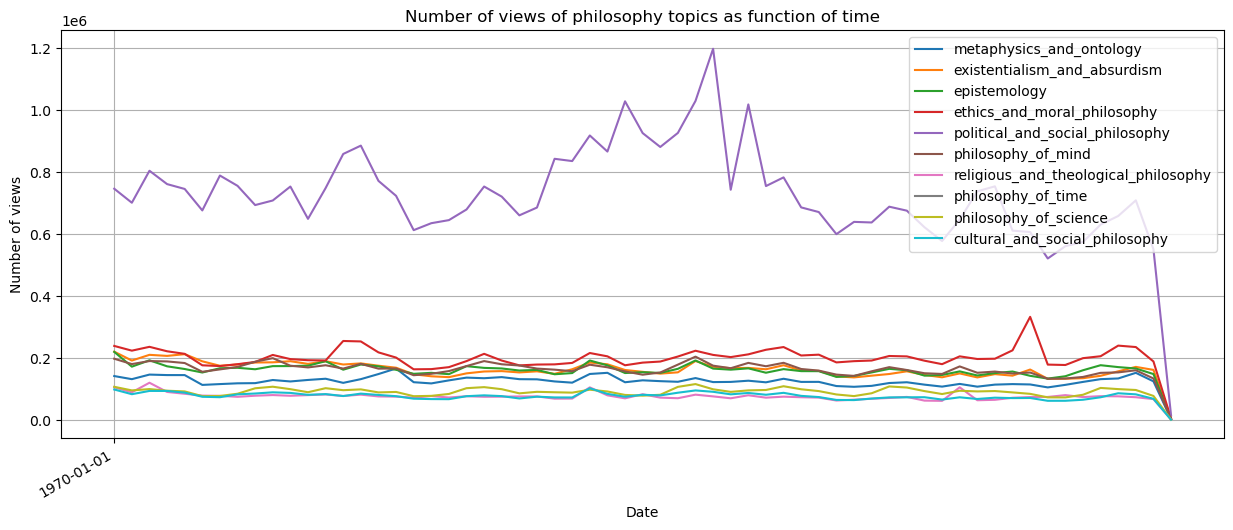

In [48]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(15, 6))

# Loop through columns in broader_philosophy_topics and plot each series against time
for column in broader_philosophy_topics.columns:
    ax.plot(broader_philosophy_topics.index, broader_philosophy_topics[column], label=column)

ax.set(xlabel='Date', ylabel='Number of views',
       title='Number of views of philosophy topics as function of time')
ax.grid()
ax.legend()
fig.autofmt_xdate()

# Display date once every 3 months
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Set interval to 3 months
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.show()

C:\Users\hippo\AppData\Local\Temp\ipykernel_4268\771372614.py:7: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  broader_philosophy_topics_relative[column] = broader_philosophy_topics[column].pct_change()


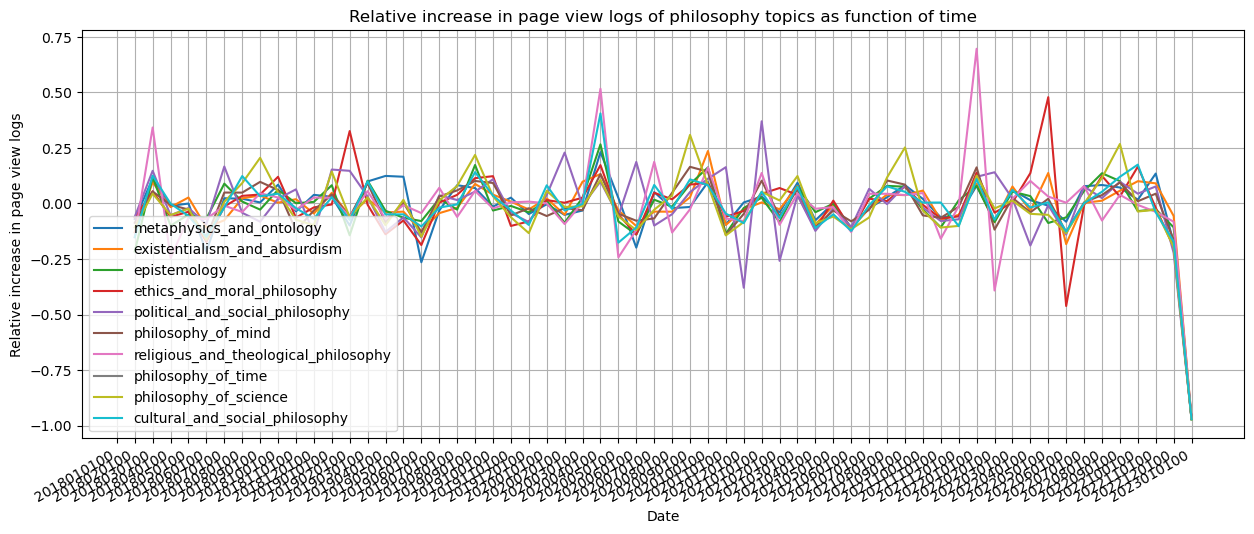

In [49]:
#For each broader philosophy plot the relative increase in page view logs
# Create an empty DataFrame to store the relative increase in page view logs
broader_philosophy_topics_relative = pd.DataFrame()

# Add relative increase in page view logs columns for each philosophy topic to the broader dataset, use for loop 
for column in broader_philosophy_topics.columns:
    broader_philosophy_topics_relative[column] = broader_philosophy_topics[column].pct_change()

#plot
fig, ax = plt.subplots(figsize=(15, 6))

# Loop through columns in broader_philosophy_topics and plot each series against time
for column in broader_philosophy_topics_relative.columns:
    ax.plot(broader_philosophy_topics_relative.index, broader_philosophy_topics_relative[column], label=column)

ax.set(xlabel='Date', ylabel='Relative increase in page view logs',
 title='Relative increase in page view logs of philosophy topics as function of time')
ax.grid()
ax.legend()
fig.autofmt_xdate()



In [ ]:
#Starting from february 2020 to july 2022, compute histogram of relative increases in page view logs for each broader philosophy topic
